In [26]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

exercicio2path = '../../02 - Analise exploratoria/src/'
datapath = 'data/'
dfpath = 'dataframes/'
dicxls = 'Dicionario_PNAD_COVID_092020.xls'
pnad = 'pnad.csv.gz'

pnad_mob = 'pnad_mob.pkl'
pnad_mob_shifted = 'pnad_mob_shifted.pkl'
mob = 'mob.pkl'
pnad = 'pnad.pkl'

mob = "mobility-rep.csv.gz"

In [2]:
df_mob = pd.read_csv(exercicio2path+dfpath+mob)

In [3]:
df = pd.read_csv(exercicio2path+dfpath+pnad)

In [4]:
dic = pd.read_excel(exercicio2path+datapath+dicxls)

In [5]:
capitais = ['São Paulo', 'Rio de Janeiro', 'Curitiba', 'Belo Horizonte', 'Manaus', 'Porto Alegre', 'Fortaleza', 'Salvador']
capitais_dict = { 'São Paulo (SP)' : 'São Paulo' ,'Rio de Janeiro (RJ)' : 'Rio de Janeiro' ,'Curitiba (PR)' : 'Curitiba' ,'Belo Horizonte (MG)' : 'Belo Horizonte' ,'Manaus (AM)' : 'Manaus' ,'Porto Alegre (RS)' : 'Porto Alegre' ,'Fortaleza (CE)' : 'Fortaleza' ,'Salvador (BA)' : 'Salvador'  }

df['CAPITAL'] = df['CAPITAL'].map(capitais_dict).fillna(df['CAPITAL'])
df = df[df['CAPITAL'].isin(capitais)]




In [6]:
df.CAPITAL.value_counts()

Rio de Janeiro    56394
São Paulo         45887
Manaus            31144
Belo Horizonte    29912
Curitiba          25160
Fortaleza         20397
Porto Alegre      18635
Salvador          14974
Name: CAPITAL, dtype: int64

In [7]:
df = df[["semana", "Mês da pesquisa", "Semana no mês", "UF","CAPITAL","RM_RIDE","teve_febre" , "teve_tosse" , "teve_dordegarganta" , "teve_dificuldaderespirar" , "teve_dordecabeça" , "teve_dorpeito" , "teve_nausea" , "teve_narizentupidoouescorrendo" , "teve_fadiga" , "teve_dornosolhos" , "teve_perdadecheiroousabor" , "teve_dormuscular" , "visitou_estabelecimento_saude" , "trabalhou_semana_passada" , "trabalho_remoto" ]]

In [8]:
df["teve_sintoma"] = ( df["teve_febre"] == "Sim" ) |  (df["teve_tosse"] == "Sim" ) |  ( df["teve_dordegarganta"] == "Sim" ) |  ( df["teve_dificuldaderespirar"] == "Sim" ) |  ( df["teve_dordecabeça"] == "Sim" ) |  ( df["teve_dorpeito"] == "Sim" ) |  ( df["teve_nausea"] == "Sim" ) |  ( df["teve_narizentupidoouescorrendo"] == "Sim" ) |  ( df["teve_fadiga"] == "Sim" ) |  ( df["teve_dornosolhos"] == "Sim" ) |  ( df["teve_perdadecheiroousabor"] == "Sim" ) |  (df["teve_dormuscular"] == "Sim" )  

In [9]:
df["total_sintoma"] = df[( df["teve_sintoma"] == True ) ].groupby(["CAPITAL","semana"])["teve_sintoma"].transform('count')
df["total_remoto"] = df[df["trabalho_remoto"]=="Sim"].groupby(["CAPITAL","semana"])["trabalho_remoto"].transform('count')

In [10]:
df_mob = df_mob[df_mob.sub_region_2.isin(capitais)]

In [11]:
df_mob.sub_region_2.value_counts()

Manaus            297
Fortaleza         297
Belo Horizonte    297
Rio de Janeiro    297
Porto Alegre      297
Curitiba          297
Salvador          297
São Paulo         297
Name: sub_region_2, dtype: int64

In [12]:
df_mob['date'] = pd.to_datetime(df_mob['date'])
df_mob['week']  = df_mob['date'].dt.week
df_mob['week_shifted']  = df_mob['date'].dt.week - 2
df_mob['month']  = df_mob['date'].dt.month

<AxesSubplot:xlabel='semana'>

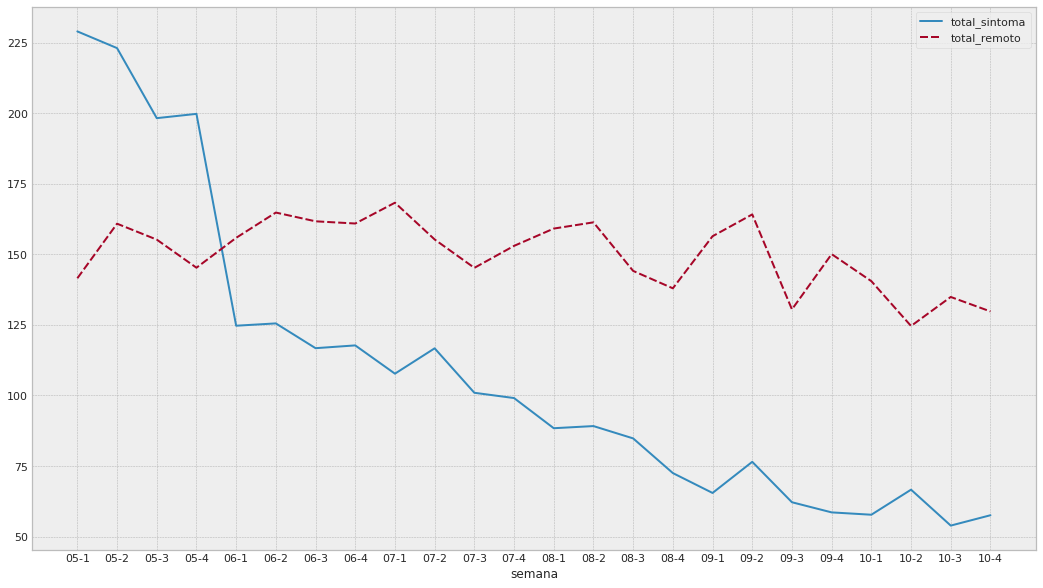

In [13]:
graf = df[df["total_sintoma"] >= 0].groupby("semana")[["semana","total_sintoma","total_remoto"]].mean()
fig = plt.subplots(figsize=(18, 10))
sns.lineplot(data=graf[["total_sintoma","total_remoto"]])



In [14]:
df_mob.week - ( df_mob.month - 1 * 4 )

13672      9
13673      9
13674     10
13675     10
13676     10
          ..
516081    41
516082    41
516083    41
516084    41
516085    42
Length: 2376, dtype: int64

In [15]:
df_mob["CAPITAL"] = df_mob["sub_region_2"] 

In [16]:
df["dia"] = df["Semana no mês"] * 7 - 6

In [17]:
df["week"] = pd.to_datetime( "2020-"+ df["Mês da pesquisa"].astype(str) + "-" + df["dia"].astype(str) ).dt.week

In [18]:
df

semana  Mês da pesquisa  Semana no mês      UF    CAPITAL  \
10        05-1                5              1  Paraná   Curitiba   
17        05-1                5              1  Paraná   Curitiba   
48        05-1                5              1  Paraná   Curitiba   
50        05-1                5              1  Paraná   Curitiba   
54        05-1                5              1  Paraná   Curitiba   
...        ...              ...            ...     ...        ...   
2268989   10-4               10              4   Ceará  Fortaleza   
2268998   10-4               10              4   Ceará  Fortaleza   
2268999   10-4               10              4   Ceará  Fortaleza   
2269003   10-4               10              4   Ceará  Fortaleza   
2269015   10-4               10              4   Ceará  Fortaleza   

                RM_RIDE teve_febre teve_tosse teve_dordegarganta  \
10        Curitiba (PR)       Não        Não                Não    
17        Curitiba (PR)       Não        Não                Não    
48        Curitiba (PR)       Não         Sim                Sim   
50        Curitiba (PR)        Sim        Sim               Não    
54        Curitiba (PR)       Não        Não                Não    
...                 ...        ...        ...                ...   
2268989  Fortaleza (CE)       Não        Não                Não    
2268998  Fortaleza (CE)       Não        Não                Não    
2268999  Fortaleza (CE)       Não        Não                Não    
2269003  Fortaleza (CE)       Não        Não                Não    
2269015  Fortaleza (CE)       Não        Não                Não    

        teve_dificuldaderespirar  ... teve_perdadecheiroousabor  \
10                          Não   ...                      Não    
17                          Não   ...                      Não    
48                          Não   ...                      Não    
50                          Não   ...                       Sim   
54                          Não   ...                      Não    
...                          ...  ...                       ...   
2268989                     Não   ...                      Não    
2268998                     Não   ...                      Não    
2268999                     Não   ...                      Não    
2269003                     Não   ...                      Não    
2269015                     Não   ...                      Não    

        teve_dormuscular visitou_estabelecimento_saude  \
10                  Não                           Não    
17                  Não                           Não    
48                   Sim                          Não    
50                   Sim                          Não    
54                  Não                  Não aplicável   
...                  ...                           ...   
2268989             Não                  Não aplicável   
2268998             Não                  Não aplicável   
2268999             Não                  Não aplicável   
2269003             Não                  Não aplicável   
2269015             Não                  Não aplicável   

        trabalhou_semana_passada trabalho_remoto teve_sintoma total_sintoma  \
10                          Não    Não aplicável         True         101.0   
17                           Sim             Sim         True         101.0   
48                          Não    Não aplicável         True         101.0   
50                          Não    Não aplicável         True         101.0   
54                          Não    Não aplicável        False           NaN   
...                          ...             ...          ...           ...   
2268989                     Não    Não aplicável        False           NaN   
2268998                     Não    Não aplicável        False           NaN   
2268999                      Sim   Não aplicável        False           NaN   
2269003                      Sim   Não aplicável        False         

In [19]:
df_c = df.groupby(["CAPITAL","week"],as_index=False)[["total_sintoma","total_remoto"]].max()


In [20]:
df_mob_c = df_mob.groupby(["CAPITAL","week"],as_index=False).mean()[["CAPITAL","week","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"]]

In [21]:
df_mob_c.rename(columns={ "workplaces_percent_change_from_baseline":"Workplaces", "residential_percent_change_from_baseline":"Residential"},inplace=True)


In [27]:
df_mob_pnad = df_c.merge( df_mob_c ).set_index("week")
df_mob_pnad.to_pickle(dfpath+pnad_mob)

# fig = plt.subplots(figsize=(18, 10))
# sns.lineplot(data=df_mob_pnad[df_mob_pnad])

In [23]:
df_mob_pnad[df_mob_pnad["CAPITAL"]=="Curitiba"]

CAPITAL  total_sintoma  total_remoto  Workplaces  Residential
week                                                                
18    Curitiba          101.0         102.0  -37.142857    17.857143
19    Curitiba           65.0          83.0  -25.714286    15.428571
20    Curitiba           48.0         105.0  -26.571429    16.285714
21    Curitiba           58.0          84.0  -25.428571    16.142857
23    Curitiba           36.0         111.0  -20.285714    15.142857
24    Curitiba           35.0          89.0  -27.428571    15.714286
25    Curitiba           38.0         113.0  -21.571429    15.571429
26    Curitiba           46.0          98.0  -25.285714    17.285714
27    Curitiba           50.0         116.0  -27.714286    16.000000
28    Curitiba           63.0          99.0  -29.142857    17.142857
29    Curitiba           70.0         126.0  -25.142857    16.000000
30    Curitiba           50.0         105.0  -23.857143    15.000000
31    Curitiba           47.0         112.0  -23.571429    15.142857
32    Curitiba           32.0          95.0  -20.000000    12.857143
33    Curitiba           45.0         114.0  -24.285714    14.571429
34    Curitiba           50.0         110.0  -21.428571    14.857143
36    Curitiba           40.0         105.0  -18.571429    10.000000
37    Curitiba           32.0          89.0  -30.285714    12.000000
38    Curitiba           29.0         113.0  -16.857143    11.285714
39    Curitiba           36.0          99.0  -15.142857    11.285714
40    Curitiba           30.0         100.0  -14.000000    11.285714
41    Curitiba           35.0          77.0  -12.714286     9.285714
42    Curitiba           32.0          86.0  -19.714286    10.428571
43    Curitiba           32.0          93.0  -11.142857     9.714286

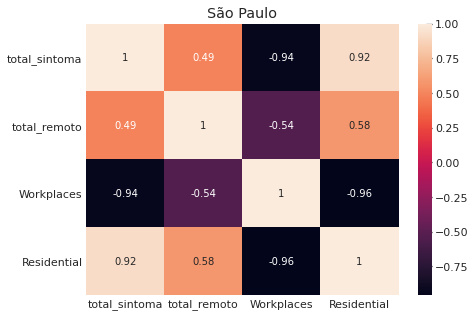

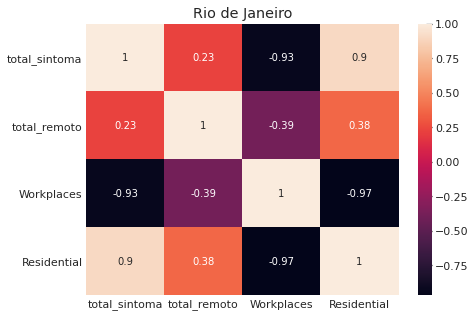

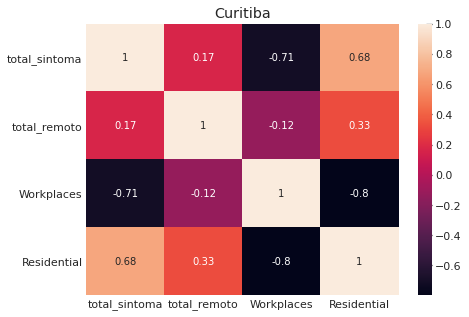

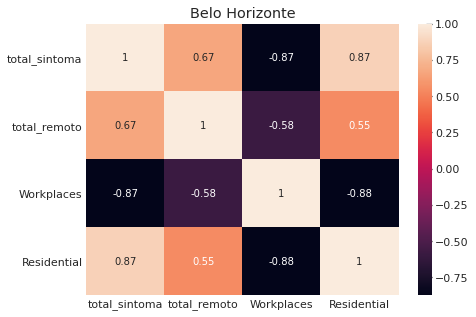

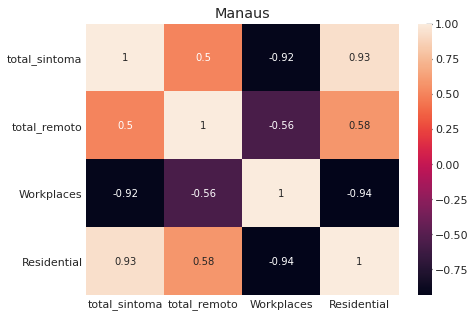

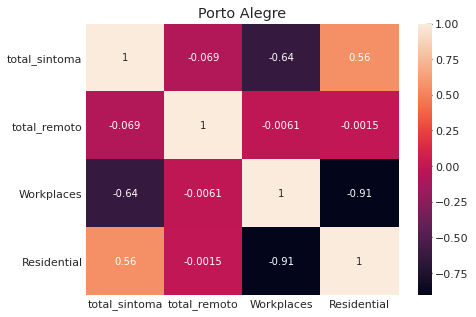

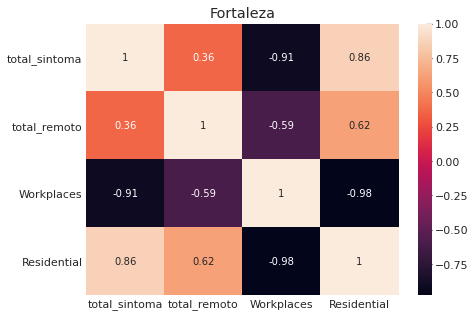

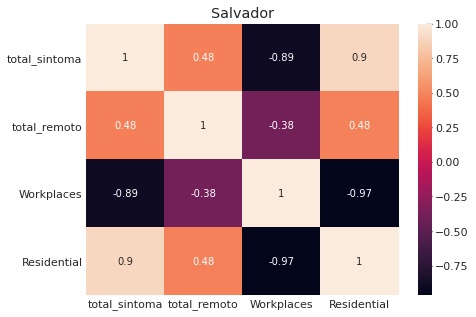

In [24]:
for capital in capitais:
    d = df_mob_pnad[df_mob_pnad["CAPITAL"]==capital].corr()
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_title(capital)
    hm = sns.heatmap(d, ax = ax, annot=True)
    plt.savefig(f'figuras/corr_pnad_mob_{capital}.png')
    

In [28]:
df_mob_c.to_pickle(dfpath+mob)
df_mob_c.to_pickle(dfpath+mob)

df_c.to_pickle(dfpath+pnad)
df_c.to_pickle(dfpath+pnad)

In [31]:
df_mob_c

CAPITAL  week  Workplaces  Residential
0    Belo Horizonte     7    4.500000     0.000000
1    Belo Horizonte     8   11.000000    -2.285714
2    Belo Horizonte     9  -20.000000     5.714286
3    Belo Horizonte    10   14.428571    -0.285714
4    Belo Horizonte    11   15.000000    -1.285714
..              ...   ...         ...          ...
347       São Paulo    46  -10.428571     9.142857
348       São Paulo    47  -13.714286    10.285714
349       São Paulo    48   -9.571429     8.571429
350       São Paulo    49  -10.000000     9.142857
351       São Paulo    50  -19.000000    10.000000

[352 rows x 4 columns]